In [1]:
%matplotlib notebook

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [17]:
# Load in csv
top50_df = pd.read_csv("top_50_combined_features.csv")
top50_df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Country
0,spotify:track:7K3BhSpAxZBznislvUMVtn,Last Night,spotify:artist:4oUHIQIBe0LHzYfvXNW4QM,Morgan Wallen,spotify:album:6i7mF7whyRJuLJ4ogbH2wh,One Thing At A Time,spotify:artist:4oUHIQIBe0LHzYfvXNW4QM,Morgan Wallen,3/3/2023,https://i.scdn.co/image/ab67616d0000b273705079...,...,-5.456,1,0.0389,0.4670,0.000000,0.1420,0.478,203.759,4,US
1,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,Kill Bill,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,SZA,spotify:album:1nrVofqDRs7cpWXJ49qTnP,SOS,spotify:artist:7tYKF4w9nC0nq9CsPZTHyP,SZA,12/8/2022,https://i.scdn.co/image/ab67616d0000b2730c471c...,...,-5.747,1,0.0391,0.0521,0.144000,0.1610,0.418,88.980,4,US
2,spotify:track:6AQbmUe0Qwf5PZnt4HmTXv,Boy's a liar Pt. 2,"spotify:artist:78rUTD7y6Cy67W1RVzYs7t, spotify...","PinkPantheress, Ice Spice",spotify:album:6cVfHBcp3AdpYY0bBglkLN,Boy's a liar Pt. 2,"spotify:artist:78rUTD7y6Cy67W1RVzYs7t, spotify...","PinkPantheress, Ice Spice",2/3/2023,https://i.scdn.co/image/ab67616d0000b27342c5ba...,...,-8.254,1,0.0500,0.2520,0.000128,0.2480,0.857,132.962,4,US
3,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,Ella Baila Sola,"spotify:artist:0XeEobZplHxzM9QzFQWLiR, spotify...","Eslabon Armado, Peso Pluma",spotify:album:3Mm1P5CEEAiuJqBclr2EyU,Ella Baila Sola,"spotify:artist:0XeEobZplHxzM9QzFQWLiR, spotify...","Eslabon Armado, Peso Pluma",3/16/2023,https://i.scdn.co/image/ab67616d0000b2732071a0...,...,-5.176,0,0.0332,0.4830,0.000019,0.0837,0.834,147.989,3,US
4,spotify:track:4DHcnVTT87F0zZhRPYmZ3B,Flowers,spotify:artist:5YGY8feqx7naU7z4HrwZM6,Miley Cyrus,spotify:album:0HiZ8fNXwJOQcrf5iflrdz,Endless Summer Vacation,spotify:artist:5YGY8feqx7naU7z4HrwZM6,Miley Cyrus,3/10/2023,https://i.scdn.co/image/ab67616d0000b27358039b...,...,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,4,US


In [19]:
# Drop extra columns

top50_clean = top50_df.drop(columns=["Track URI", "Artist URI(s)", "Album URI", "Album Artist URI(s)", 
                       "Album Artist Name(s)", "Album Image URL", "Disc Number", 
                       "Track Number", "Track Preview URL", "ISRC", "Added By", "Added At"])

In [20]:
# top50_clean.head()
top50_clean.tail()

,Track Name,Artist Name(s),Album Name,Album Release Date,Track Duration (ms),Explicit,Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Country
245,Cookie,NewJeans,NewJeans 1st EP 'New Jeans',8/1/2022,235562,False,82,0.847,0.638,0,-3.764,1,0.0575,0.0596,0.00000,0.0894,0.661,156.935,4,SK
246,Lemon,Kenshi Yonezu,STRAY SHEEP,8/5/2020,255826,False,71,0.525,0.646,11,-4.963,1,0.0268,0.3040,0.00000,0.2970,0.373,86.957,4,SK
247,Lovely Touch,Lim Young Woong,IM HERO,5/2/2022,195173,False,54,0.372,0.551,6,-3.508,1,0.0324,0.5360,0.00000,0.2260,0.444,105.104,3,SK
248,As It Was,Harry Styles,Harry's House,5/20/2022,167303,False,92,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.00101,0.3110,0.662,173.930,4,SK
249,ベテルギウス,Yuuri,壱,1/12/2022,230600,False,74,0.367,0.671,5,-4.604,1,0.0478,0.2220,0.00000,0.4940,0.691,179.833,4,SK


<IPython.core.display.Javascript object>


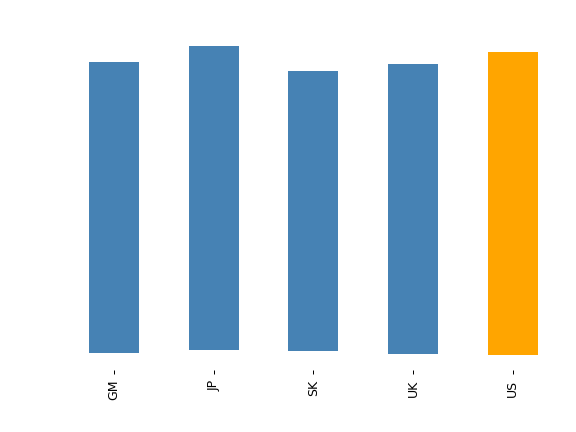

In [45]:
# Split up data into groups based upon "Country"
country_groups = top50_clean.groupby("Country")

# Find average Danceability score
danceability_avg = country_groups["Danceability"].mean()

# Chart danceability by country
danceability_chart = danceability_avg.plot(kind="bar", title="Average Danceability by Country", color=["steelblue", "steelblue", "steelblue", "steelblue", "orange"])
danceability_chart.set_xlabel("Country")
danceability_chart.set_ylabel("Average Danceability")

plt.show()
plt.tight_layout()

In [46]:
plt.savefig('avgDanceability_barChart.png', bbox_inches='tight')

In [47]:
# Split up data into groups based upon "Country"
country_groups = top50_clean.groupby("Country")

# Find average Danceability score
energy_avg = country_groups["Energy"].mean()

# Chart danceability by country
energy_chart = energy_avg.plot(kind="bar", title="Average Energy by Country", color=["steelblue", "steelblue", "steelblue", "steelblue", "orange"])
energy_chart.set_xlabel("Country")
energy_chart.set_ylabel("Average Energy")

plt.show()
plt.tight_layout()

In [48]:
plt.savefig("avgEnergy_barChart.png", bbox_inches='tight')

In [50]:
# Split up data into groups based upon "Country"
country_groups = top50_clean.groupby("Country")

# Find average tempo score
tempo_avg = country_groups["Tempo"].mean()

# Chart danceability by country
tempo_chart = tempo_avg.plot(kind="bar", title="Average Tempo by Country", color=["steelblue", "steelblue", "steelblue", "steelblue", "orange"])
tempo_chart.set_xlabel("Country")
tempo_chart.set_ylabel("Average Tempo")

plt.show()
plt.tight_layout()

plt.savefig("avgTempo_barChart.png", bbox_inches='tight')


In [53]:
# Split up data into groups based upon "Country"
country_groups = top50_clean.groupby("Country")

# Find average loudness score
loudness_avg = country_groups["Loudness"].mean()

# Chart danceability by country
loudness_chart = loudness_avg.plot(kind="bar", title="Average Loudness by Country", color=["steelblue", "steelblue", "steelblue", "steelblue", "orange"])
loudness_chart.set_xlabel("Country")
loudness_chart.set_ylabel("Average Loudness")

plt.show()
plt.tight_layout()

plt.savefig("avgLoudness_barChart.png", bbox_inches='tight')


<IPython.core.display.Javascript object>


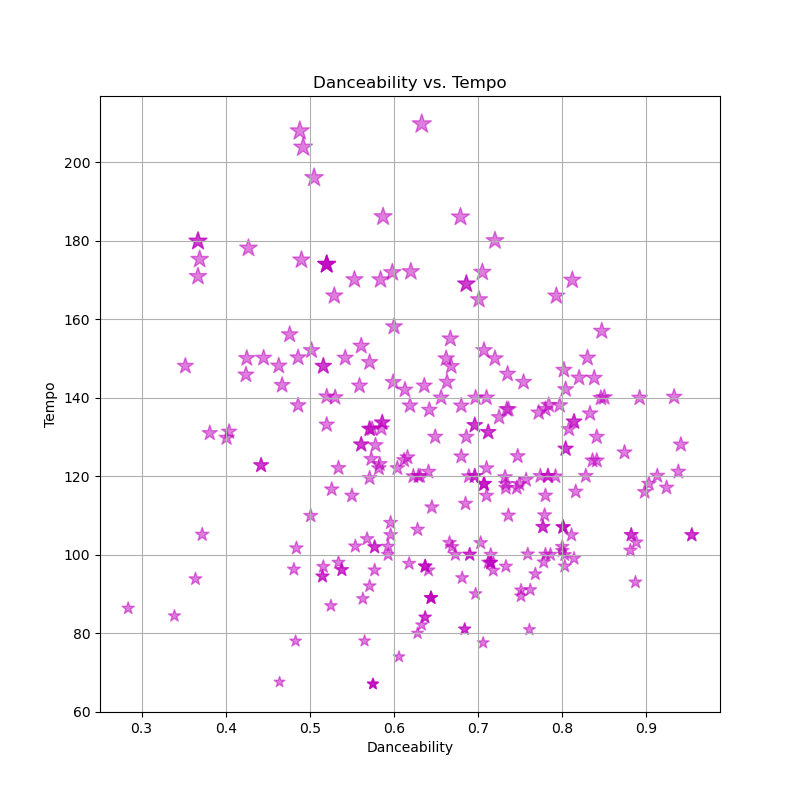

In [92]:
# Scatter plot
# Create scatter plot that compares popularity to danceability
country_groups = top50_clean.groupby("Country")
top50_clean.plot(kind="scatter", x="Danceability", y="Tempo", s="Tempo",
                grid=True, figsize=(8,8), title="Danceability vs. Tempo", 
                color="m", marker="*", alpha=0.5)

plt.show()

plt.savefig("Tempo_Danceability.png", bbox_inches='tight')


<IPython.core.display.Javascript object>


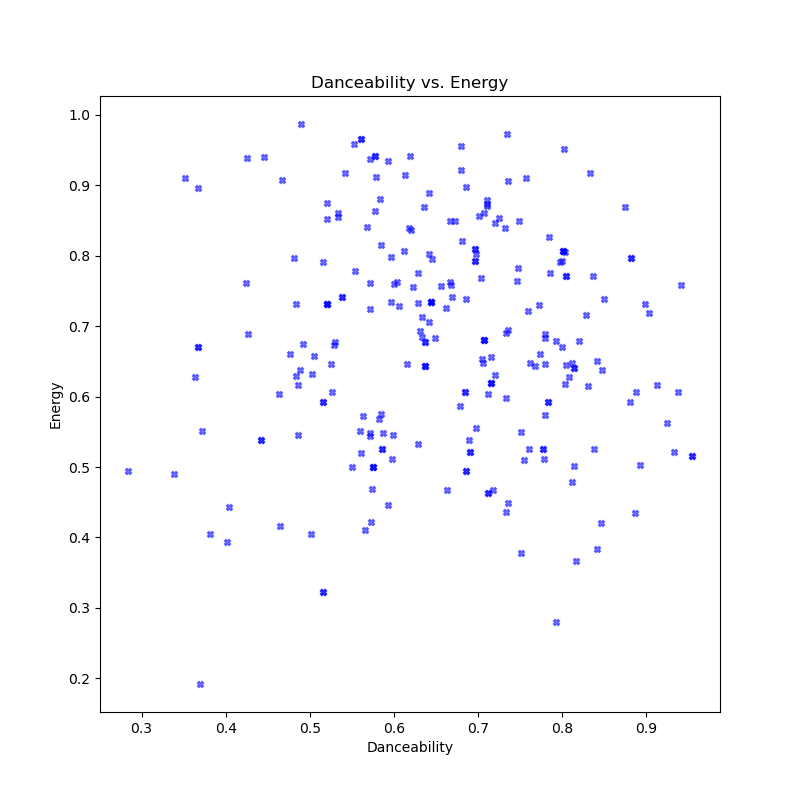

In [107]:
# Scatter plot
# Create scatter plot that compares popularity to energy
country_groups = top50_clean.groupby("Country")
top50_clean.plot(kind="scatter", x="Danceability", y="Energy", s=20,
                grid=True, figsize=(8,8), title="Danceability vs. Energy", 
                color="b", marker="X", alpha=0.5)

plt.show()

plt.savefig("Energy_Danceability.png", bbox_inches='tight')

<IPython.core.display.Javascript object>


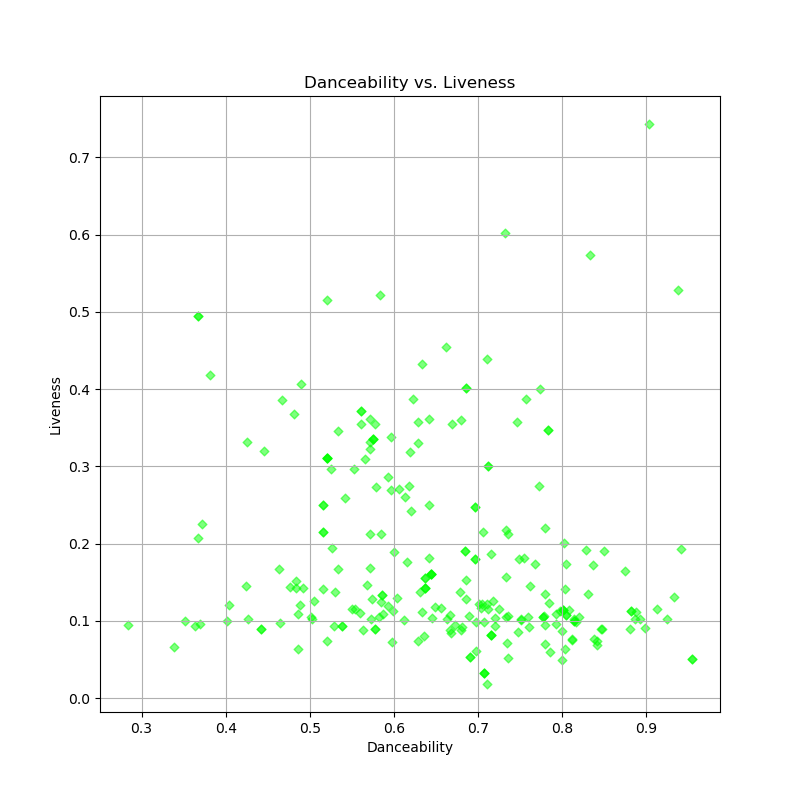

In [108]:
# Scatter plot
# Create scatter plot that compares popularity to energy
country_groups = top50_clean.groupby("Country")
top50_clean.plot(kind="scatter", x="Danceability", y="Liveness", s=20,
                grid=True, figsize=(8,8), title="Danceability vs. Liveness", 
                color="lime", marker="D", alpha=0.5)

plt.show()

plt.savefig("Liveness_Danceability.png", bbox_inches='tight')